In [45]:
from obspy import read
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

#Ignore warnings due to python 2 and 3 conflict
import warnings
warnings.filterwarnings("ignore")

In [103]:
stream = read("2015.0529.0700/*Z.sac")

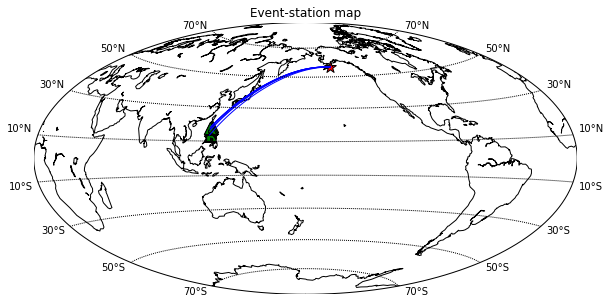

In [48]:
plt.figure(figsize=(10,5))
# setup mercator map projection.
m = Basemap(lon_0=180,projection='hammer')
evlat = stream[0].stats.sac.evla; evlon = stream[0].stats.sac.evlo

#Plot the event
xx,yy = m(evlon,evlat)
m.scatter(xx, yy, marker = "*" ,s=150, c="r" , edgecolors = "k", alpha = 1)

for tr in stream:
    stlat = tr.stats.sac.stla; stlon = tr.stats.sac.stlo 
    m.drawgreatcircle(stlon,stlat,evlon,evlat,linewidth=1,color='b')
    xx,yy = m(stlon,stlat)
    m.scatter(xx, yy, marker = "^" ,s=150, c="g" , edgecolors = "k", alpha = 1)
    
m.drawcoastlines()
#m.fillcontinents()
m.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
plt.title("Event-station map")
plt.show()

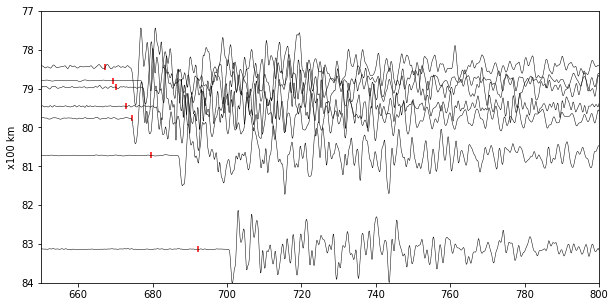

In [96]:
plt.figure(figsize=(10,5))
for tr in stream:
    tr.normalize()
    dist = tr.stats.sac.dist
    plt.plot(tr.times(),tr.data+dist*0.01,c="k",linewidth=0.5)
    plt.scatter(tr.stats.sac.t3,dist*0.01,marker="|",color="r")
plt.ylabel("x100 km")    
plt.ylim(84,77)
plt.xlim(650,800)
plt.show()

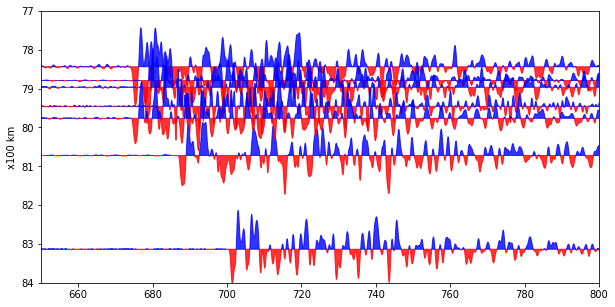

In [97]:
plt.figure(figsize=(10,5))
for tr in stream:
    tr.normalize()
    dist = tr.stats.sac.dist*0.01
    x = tr.times()
    y = tr.data+dist
    plt.fill_between(x,y, dist, y > dist, color='r', alpha = 0.8)
    plt.fill_between(x,y, dist, y < dist, color='b', alpha = 0.8)
plt.ylabel("x100 km")    
plt.ylim(84,77)
plt.xlim(650,800)
plt.show()